**Install necessary libraries**

In [1]:

!pip install pandas scikit-learn matplotlib seaborn
!pip install pandas plotly

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



**Step 1: Data Loading and Processing**

In [2]:
# Install necessary libraries (uncomment if needed in Colab)
# !pip install pandas plotly

import pandas as pd
import plotly.graph_objects as go
from IPython.display import display

# Step 1: Data Loading and Processing
# Load the data
url = '/content/MP2_Data.csv'
data = pd.read_csv(url)

# Drop the 'ID' column as it is not useful for prediction
data = data.drop(columns=['ID'])

# Function to show data in an interactive table with better UI, padding for the first row (header), and width adjustment
def show_data_table(df, max_rows=10, table_width=1800, header_padding=3):
    # Add padding only to the header (first row/column names)
    padded_header = [f"{' ' * header_padding}{col}{' ' * header_padding}" for col in df.columns]

    fig = go.Figure(data=[go.Table(
        header=dict(values=padded_header,  # Apply padding to the header
                    fill_color='paleturquoise',
                    align='center',
                    font=dict(size=12, color='black'),
                    height=60),  # Increased header height for better spacing
        cells=dict(values=[df[col] for col in df.columns],  # Keep normal data cells
                   fill_color='lavender',
                   align='center',
                   height=35,  # Increased row height for more padding
                   font=dict(size=11, color='black'),
                   line_color='darkslategray')
    )])

    # Adjust the width of the table using layout
    fig.update_layout(width=table_width)  # Adjust the total width of the table (default 1800)

    # Adjust height dynamically for rows
    if len(df) > max_rows:
        fig.update_layout(height=40 * (max_rows + 1))  # Adjusting table height dynamically
        print(f"Displaying the first {max_rows} rows of the dataset. The dataset has {len(df)} rows in total.")
    else:
        fig.update_layout(height=40 * (len(df) + 1))  # Adjusting table height dynamically

    fig.show()

# Example of calling the function with header padding
show_data_table(data, max_rows=20, table_width=5200, header_padding=5)  # Adjust header padding as needed

# Step 2: Check for Missing Values
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Filter out columns with no missing values

# Function to display missing values in a table format with adjusted column width and height
if not missing_data.empty:
    missing_df = pd.DataFrame({'Feature': missing_data.index, 'Missing Values': missing_data.values})

    fig = go.Figure(data=[go.Table(
        header=dict(values=["Feature", "Missing Values"],
                    fill_color='paleturquoise',
                    align='center',
                    font=dict(size=14, color='black'),
                    height=60),  # Increased header height to avoid overlapping
        cells=dict(values=[missing_df['Feature'], missing_df['Missing Values']],
                   fill_color='lavender',
                   align='center',
                   height=40,  # Increased row height for better spacing
                   font=dict(size=12, color='black'),
                   line_color='darkslategray')
    )])

    # Adjust table layout width
    fig.update_layout(width=1000)  # Adjust layout width for the missing values table

    print("\nMissing values in the dataset:")
    fig.show()
else:
    print("\nNo missing values found in the dataset.")


Displaying the first 20 rows of the dataset. The dataset has 107 rows in total.



No missing values found in the dataset.


**Step 2: Data Split (Train/Test)**

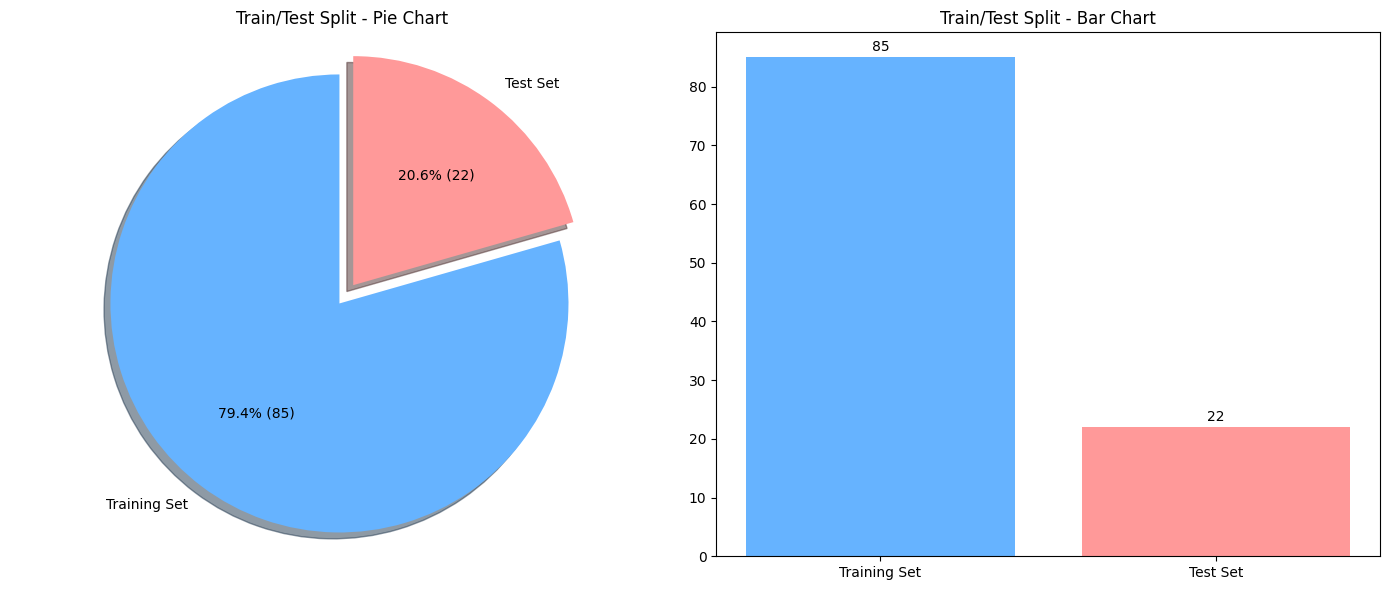

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 2: Data Split (Train/Test)
# Separate features and target variable
X = data.drop(columns=['Grade'])  # Features (all columns except 'Grade')
y = data['Grade']  # Target variable (Grade)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizing the Train/Test Split
train_size = len(X_train)
test_size = len(X_test)
total_size = train_size + test_size

# Create labels for the chart
labels = ['Training Set', 'Test Set']

# Sizes for each split
sizes = [train_size, test_size]

# Define colors for the chart
colors = ['#66b3ff', '#ff9999']

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Pie chart (left side)
axs[0].pie(sizes, labels=labels, colors=colors, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, (p/100)*total_size), startangle=90, shadow=True, explode=(0.1, 0))
axs[0].set_title('Train/Test Split - Pie Chart')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Bar chart (right side)
bars = axs[1].bar(labels, sizes, color=colors)
axs[1].set_title('Train/Test Split - Bar Chart')

# Displaying the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

# Show both charts
plt.tight_layout()
plt.show()


**Step 3: Model Training**

Random Forest 5-Fold CV R²: 0.9932 (+/- 0.0094)
Gradient Boosting 5-Fold CV R²: 0.9980 (+/- 0.0041)
Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Random Forest - MSE: 0.03951022727272726, R²: 0.9906121993127148
Gradient Boosting - MSE: 0.024397813601994167, R²: 0.9942029740876951


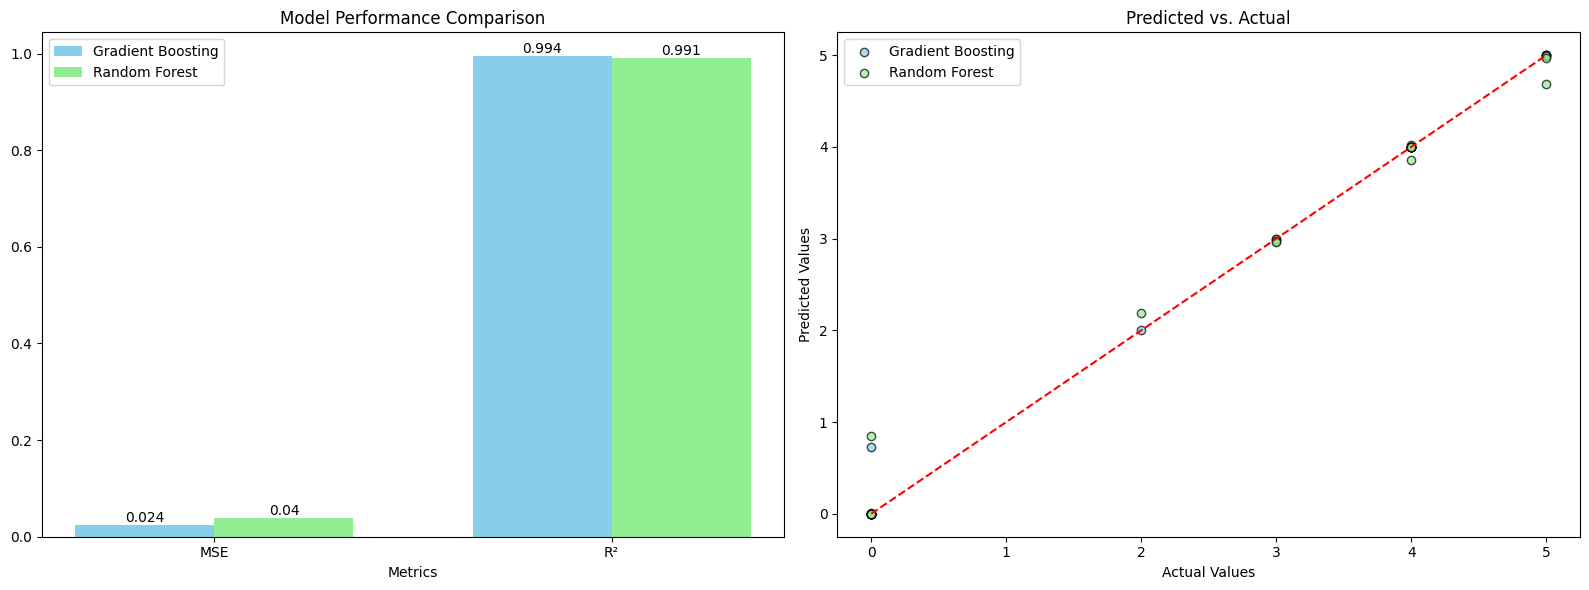

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# ------------------ Cross-Validation -------------------

# Cross-validation for Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Random Forest 5-Fold CV R²: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std():.4f})")

# Cross-validation for Gradient Boosting
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_cv_scores = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='r2')
print(f"Gradient Boosting 5-Fold CV R²: {gbr_cv_scores.mean():.4f} (+/- {gbr_cv_scores.std():.4f})")

# ------------------ Hyperparameter Tuning -------------------

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters for Random Forest
print(f"Best hyperparameters for Random Forest: {grid_search_rf.best_params_}")

# Define the hyperparameter grid for Gradient Boosting
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Initialize GridSearchCV for Gradient Boosting
grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid_gbr, cv=5, scoring='r2')
grid_search_gbr.fit(X_train, y_train)

# Print the best hyperparameters for Gradient Boosting
print(f"Best hyperparameters for Gradient Boosting: {grid_search_gbr.best_params_}")

# ------------------ Model Training with Best Models -------------------

# Use the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predictions for Random Forest
y_pred_rf = best_rf_model.predict(X_test)

# Random Forest Performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")

# Use the best Gradient Boosting model
best_gbr_model = grid_search_gbr.best_estimator_
best_gbr_model.fit(X_train, y_train)

# Predictions for Gradient Boosting
y_pred_gbr = best_gbr_model.predict(X_test)

# Gradient Boosting Performance
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Gradient Boosting - MSE: {mse_gbr}, R²: {r2_gbr}")

# --------------- Visualization ----------------
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Bar plot comparing MSE and R² for the two models
metrics = ['MSE', 'R²']
gbr_metrics = [mse_gbr, r2_gbr]
rf_metrics = [mse_rf, r2_rf]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

# Bar plot (left side)
bars1 = axs[0].bar(x - width/2, gbr_metrics, width, label='Gradient Boosting', color='skyblue')
bars2 = axs[0].bar(x + width/2, rf_metrics, width, label='Random Forest', color='lightgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[0].set_xlabel('Metrics')
axs[0].set_title('Model Performance Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(metrics)
axs[0].legend()

# Adding the values on top of the bars
for bar in bars1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Scatter plot (right side)
axs[1].scatter(y_test, y_pred_gbr, color='skyblue', edgecolor='k', alpha=0.7, label='Gradient Boosting')
axs[1].scatter(y_test, y_pred_rf, color='lightgreen', edgecolor='k', alpha=0.7, label='Random Forest')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axs[1].set_title('Predicted vs. Actual')
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Predicted Values')
axs[1].legend()

plt.tight_layout()
plt.show()


At first I used 4 models for testing and getting better accuracy

The two best-performing models are **Gradient Boosting** and **Random Forest**.

**Gradient Boosting Regressor:**

**Why:** It has the lowest MSE (0.02439) and the highest R² (0.99420), meaning it provides the most accurate predictions with the best ability to explain the
variance in the target variable. It builds on the strengths of each previous tree, resulting in a highly accurate model.
Random Forest Regressor:

**Random Forest:**

**Why:** It has a slightly higher MSE (0.039510) than Gradient Boosting, but it is still an excellent model, with a high R² (0.99061). Random Forest is more robust and easier to tune compared to Gradient Boosting, and it handles a wide variety of data types well.

**Why Not Linear Regression or KNN:**
Linear Regression has a much higher MSE and lower R², meaning it does not capture the complexity of the data as well as the other models.
KNN Regressor performs better than Linear Regression but is still worse than Random Forest and Gradient Boosting, with a much higher MSE and lower R².
Conclusion:
**Best Model:** Gradient Boosting Regressor (most accurate and best at explaining variance).

**Second Best Model:** Random Forest Regressor (still very accurate, slightly behind Gradient Boosting but more robust).

**Step 4: Performance Evaluation**

Tuned Random Forest - MSE: 0.03951022727272726, R²: 0.9906121993127148
Tuned Gradient Boosting - MSE: 0.024397813601994167, R²: 0.9942029740876951


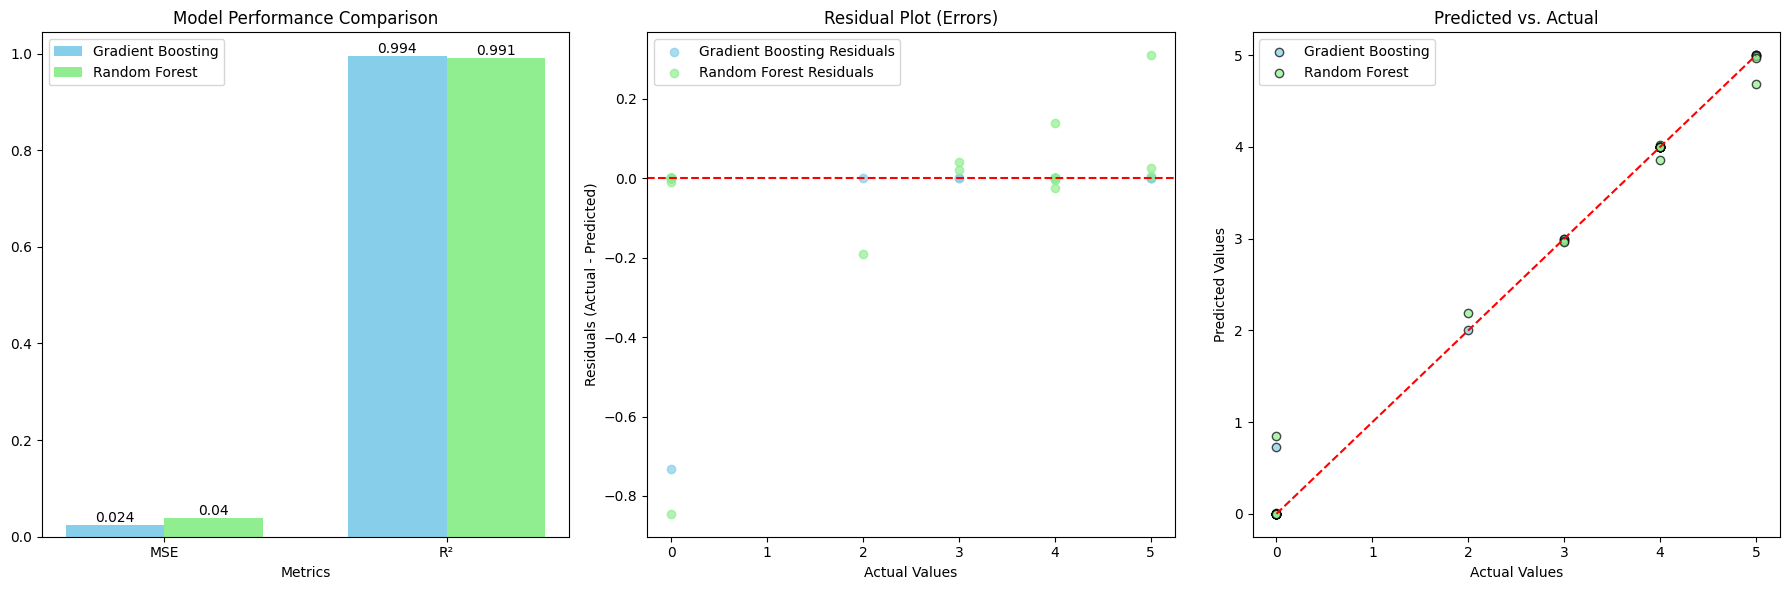

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# ------------------ Using Best Models Found in Tuning -------------------

# Use the best Random Forest model from tuning
y_pred_rf = best_rf_model.predict(X_test)

# Random Forest Performance (Tuned Model)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Tuned Random Forest - MSE: {mse_rf}, R²: {r2_rf}")

# Use the best Gradient Boosting model from tuning
y_pred_gbr = best_gbr_model.predict(X_test)

# Gradient Boosting Performance (Tuned Model)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Tuned Gradient Boosting - MSE: {mse_gbr}, R²: {r2_gbr}")

# ----------- Visualization: Performance Comparison -----------
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for the 3 types of visualizations

# 1. Bar Plot Comparing MSE and R² for Both Models
metrics = ['MSE', 'R²']
gbr_metrics = [mse_gbr, r2_gbr]
rf_metrics = [mse_rf, r2_rf]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

bars1 = axs[0].bar(x - width/2, gbr_metrics, width, label='Gradient Boosting', color='skyblue')
bars2 = axs[0].bar(x + width/2, rf_metrics, width, label='Random Forest', color='lightgreen')

axs[0].set_xlabel('Metrics')
axs[0].set_title('Model Performance Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(metrics)
axs[0].legend()

# Add values to the bar chart
for bar in bars1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# 2. Residual Plot: Visualizing Errors
residuals_gbr = y_test - y_pred_gbr
residuals_rf = y_test - y_pred_rf

axs[1].scatter(y_test, residuals_gbr, color='skyblue', alpha=0.7, label='Gradient Boosting Residuals')
axs[1].scatter(y_test, residuals_rf, color='lightgreen', alpha=0.7, label='Random Forest Residuals')
axs[1].axhline(y=0, color='red', linestyle='--')
axs[1].set_title('Residual Plot (Errors)')
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Residuals (Actual - Predicted)')
axs[1].legend()

# 3. Predicted vs. Actual Scatter Plot for Both Models
axs[2].scatter(y_test, y_pred_gbr, color='skyblue', edgecolor='k', alpha=0.7, label='Gradient Boosting')
axs[2].scatter(y_test, y_pred_rf, color='lightgreen', edgecolor='k', alpha=0.7, label='Random Forest')
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axs[2].set_title('Predicted vs. Actual')
axs[2].set_xlabel('Actual Values')
axs[2].set_ylabel('Predicted Values')
axs[2].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


**Step 5: Important Features**

Top 3 Important Features from Random Forest:
       Feature  Random Forest Importance
9  Week8_Total                  0.421224
5    Week7_MP3                  0.232550
3    Week5_MP2                  0.215714
Top 3 Important Features from Gradient Boosting:
       Feature  Gradient Boosting Importance
9  Week8_Total                      0.381512
5    Week7_MP3                      0.343299
3    Week5_MP2                      0.275189


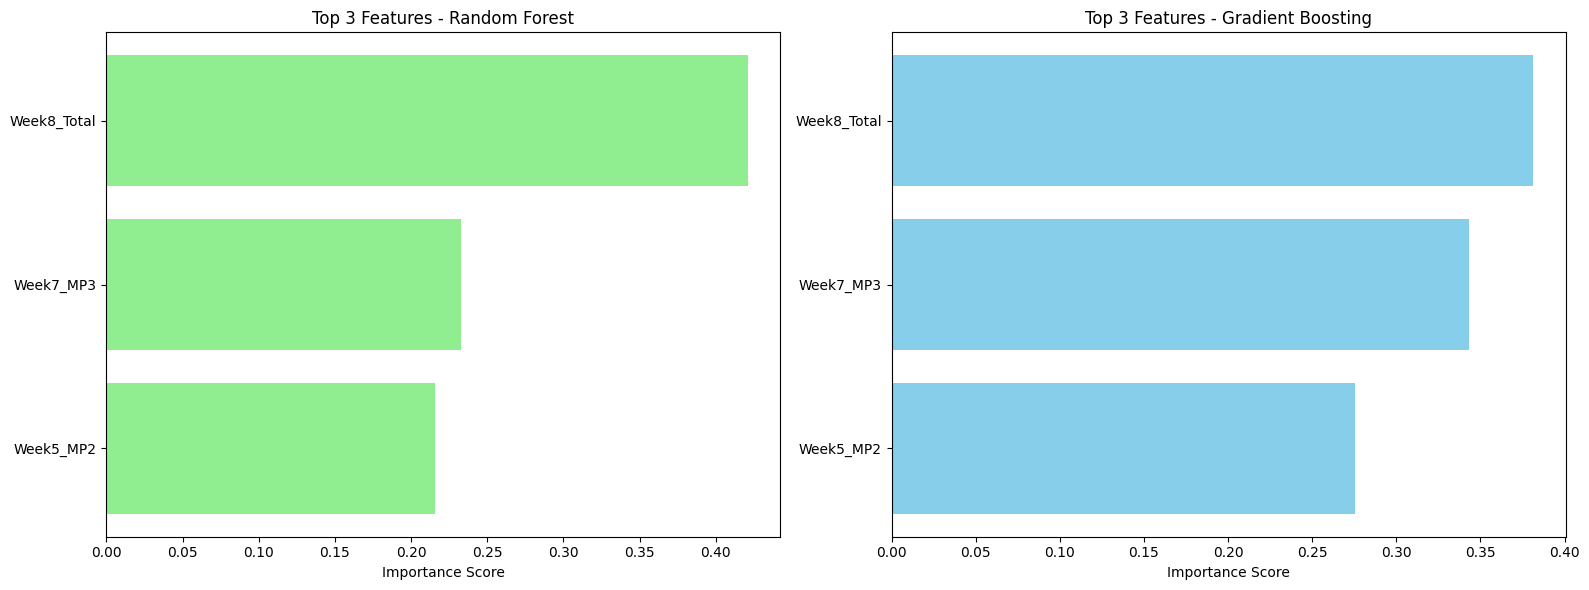

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train is your training data and the columns represent the feature names
feature_names = X_train.columns

# Feature importance from the best Random Forest model (tuned model)
rf_importances = best_rf_model.feature_importances_

# Feature importance from the best Gradient Boosting model (tuned model)
gbr_importances = best_gbr_model.feature_importances_

# Create a DataFrame to store feature importance for both models
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest Importance': rf_importances,
    'Gradient Boosting Importance': gbr_importances
})

# Sort by Random Forest importance
feature_importance_df_rf = feature_importance_df.sort_values(by='Random Forest Importance', ascending=False)

# Show the top 3 features for Random Forest
print("Top 3 Important Features from Random Forest:")
print(feature_importance_df_rf[['Feature', 'Random Forest Importance']].head(3))

# Sort by Gradient Boosting importance
feature_importance_df_gbr = feature_importance_df.sort_values(by='Gradient Boosting Importance', ascending=False)

# Show the top 3 features for Gradient Boosting
print("Top 3 Important Features from Gradient Boosting:")
print(feature_importance_df_gbr[['Feature', 'Gradient Boosting Importance']].head(3))

# --------------- Visualization: Top 5 Important Features ---------------
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest: Feature Importance
axs[0].barh(feature_importance_df_rf['Feature'][:3], feature_importance_df_rf['Random Forest Importance'][:3], color='lightgreen')
axs[0].set_title('Top 3 Features - Random Forest')
axs[0].invert_yaxis()  # Highest importance at the top
axs[0].set_xlabel('Importance Score')

# Gradient Boosting: Feature Importance
axs[1].barh(feature_importance_df_gbr['Feature'][:3], feature_importance_df_gbr['Gradient Boosting Importance'][:3], color='skyblue')
axs[1].set_title('Top 3 Features - Gradient Boosting')
axs[1].invert_yaxis()  # Highest importance at the top
axs[1].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()
